In [396]:
import matplotlib.pylab as plt
import numpy as np
from random import uniform
from functools import reduce

In [397]:
# sampling rate (must be of base 2)
sr = 1024
# sampling interval
ts = 1/sr
t = np.arange(-0.5, 0.5, ts)

In [398]:
old_freqs = []
def randomSine():
    # frequency of the signal
    freq = uniform(1, 500)
    randPhase = uniform(0,1)
    
    # prevent from picking the same frequencies
    while freq in old_freqs:
        freq = uniform(1, 100)
    old_freqs.append(freq)
    
    t = np.arange(randPhase, randPhase+1, ts)
    return np.sin(2*np.pi*freq*t)

In [399]:
def sum_curves(curves: list[list]):
    summed = []
    for i in range(sr):
        sm = 0
        for curve in curves:
            sm += curve[i]
        summed.append(sm)
    return summed

In [400]:
# number of peaks you want to see in fft
# number of different frequencies on the curve
N = 20
# Generate a radom curve with different frequencies
input = sum_curves([randomSine() for _ in range(N)])

In [401]:
complexJ = 0 + 1j
def ditff2(x: list) -> list:
    n = len(x)
    if n == 1:
        return x
    wn = np.e ** ((2*np.pi*complexJ)/n)
    w = 1
    half = int(n/2)
    halfLeft = [even for (index, even) in enumerate(x[:-1]) if index % 2 == 0]
    halfRight = [odd for (index, odd) in enumerate(x) if not index % 2 == 0]

    yk_0 = ditff2(halfLeft)
    yk_1 = ditff2(halfRight)
    y = [None] * n
    for i in range(half):
        y[i] = yk_0[i] + w * yk_1[i]
        y[i+half] = yk_0[i] - w * yk_1[i]
        w = w*wn
    return y

In [402]:
fft = ditff2(input)

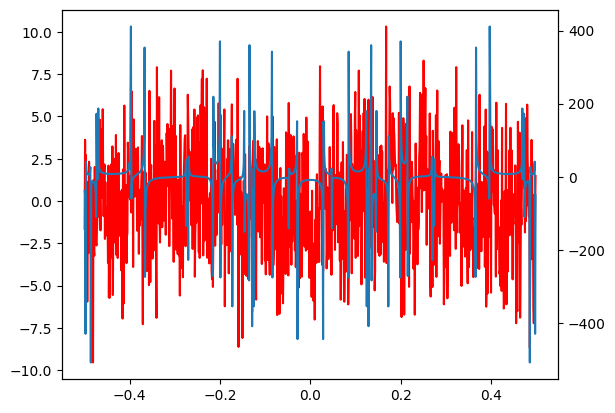

In [403]:
fig, ax = plt.subplots()
bx = ax.twinx()

plt_1 = ax.plot(t, input, 'r', label="bbb")
plt_2 = bx.plot(t, fft, label="aaa")


[]

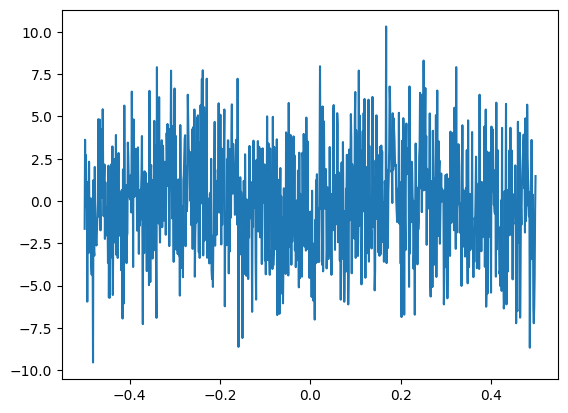

In [404]:
# plot input
_, bx = plt.subplots()
bx.plot(t, input)
plt.plot()

[]

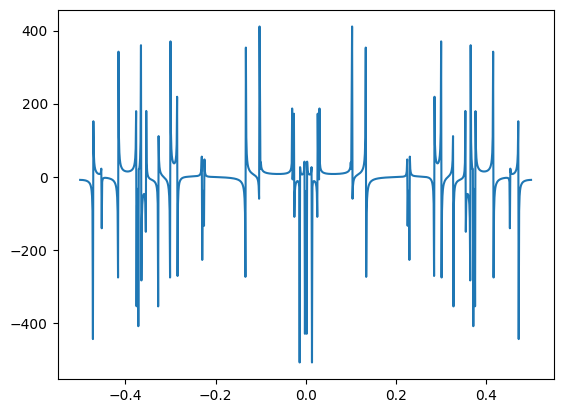

In [415]:
#Plot FFT
_, bx = plt.subplots()
half = len(fft)//2
bx.plot(t, fft[half:] + fft[:half])
plt.plot()

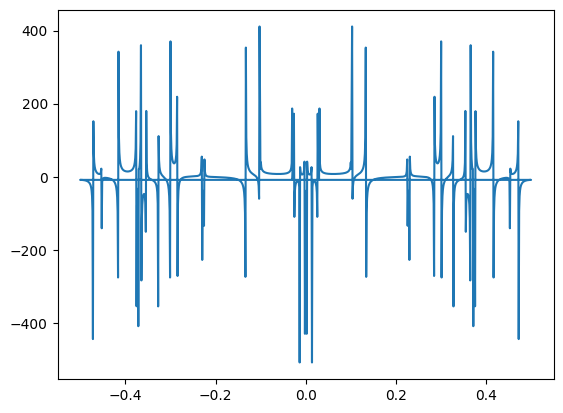

In [406]:
sp = np.fft.fft(input)
freq = np.fft.fftfreq(t.shape[-1])
plt.plot(freq, sp.real)